<a href="https://colab.research.google.com/github/hbskay3110/bt/blob/main/Nhom_8_ProjectSeminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhóm-8_Project giữa  kì Machine Learning**
1. Nguyễn Trung Kiên - 20130298
2. Phan Thị An - 20130195

 **Deadline: 23:59, 16/5/2023**



# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Lab_6'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_6


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import svm
from sklearn import set_config
from prettytable import PrettyTable
from nltk.metrics.scores import accuracy
from sklearn import datasets
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Convolution2D, Dropout
from keras import Sequential,regularizers
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import preprocessing
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
dataset = pd.read_excel("Raisin_Dataset.xlsx")
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


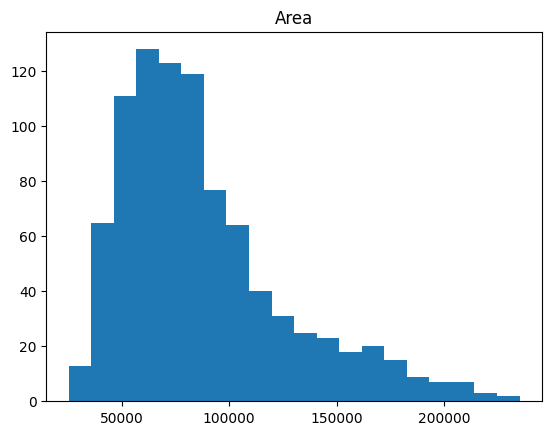

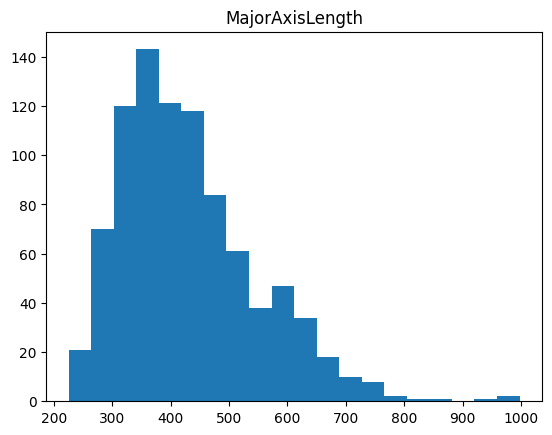

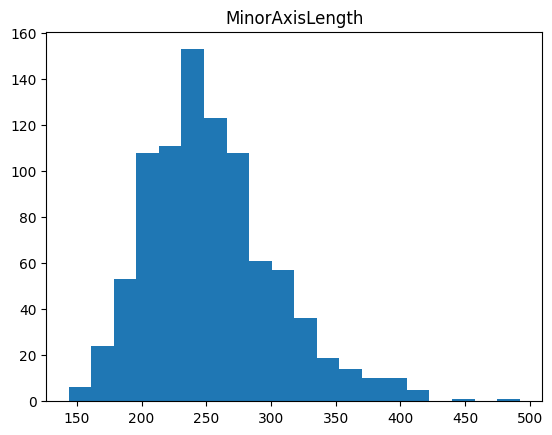

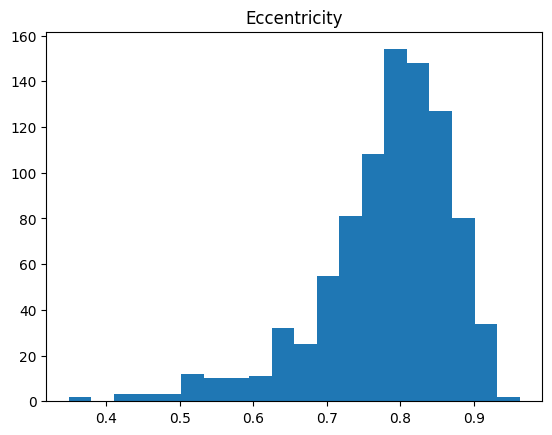

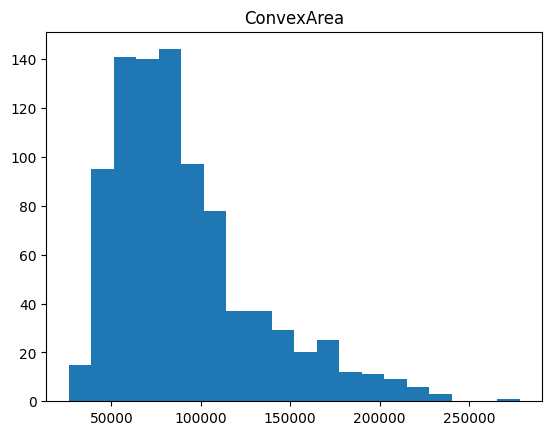

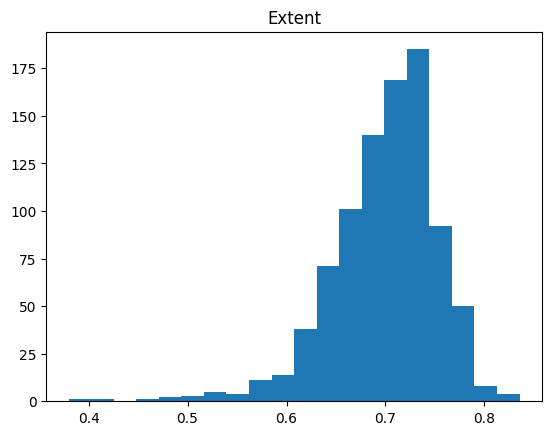

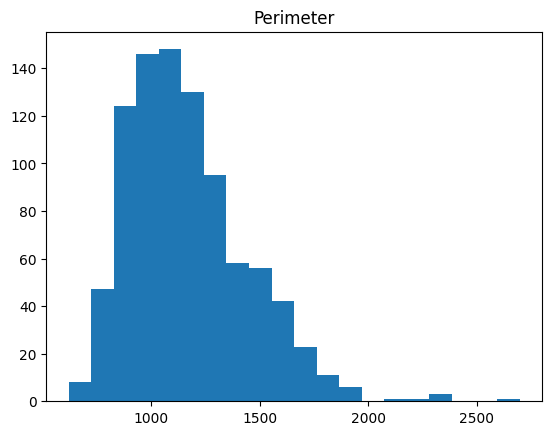

In [ ]:
for col in dataset.columns[:-1]:
    # Create a histogram of the attribute values
    plt.hist(dataset[col], bins=20)
    plt.title(col)
    plt.show()

<ipython-input-35-3f2da43d13cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

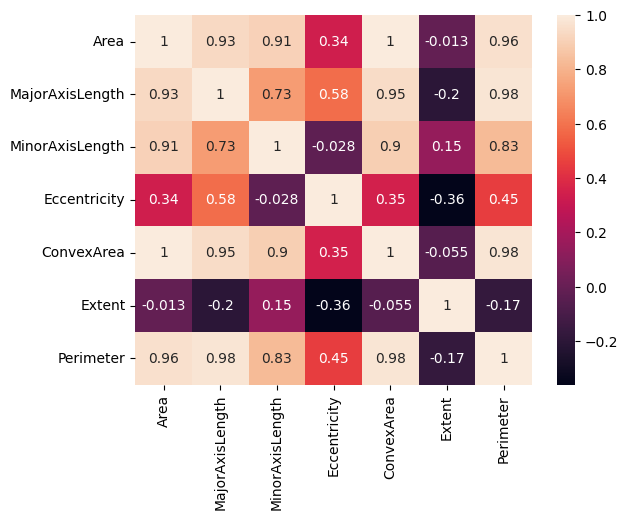

In [ ]:
# Hiển thị mức độ tương quan (correlation) giữa các cặp thuộc tính trong dataset,annot=True được sử dụng để hiển thị giá trị tương quan trên từng ô trong heatmap
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
dataset.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


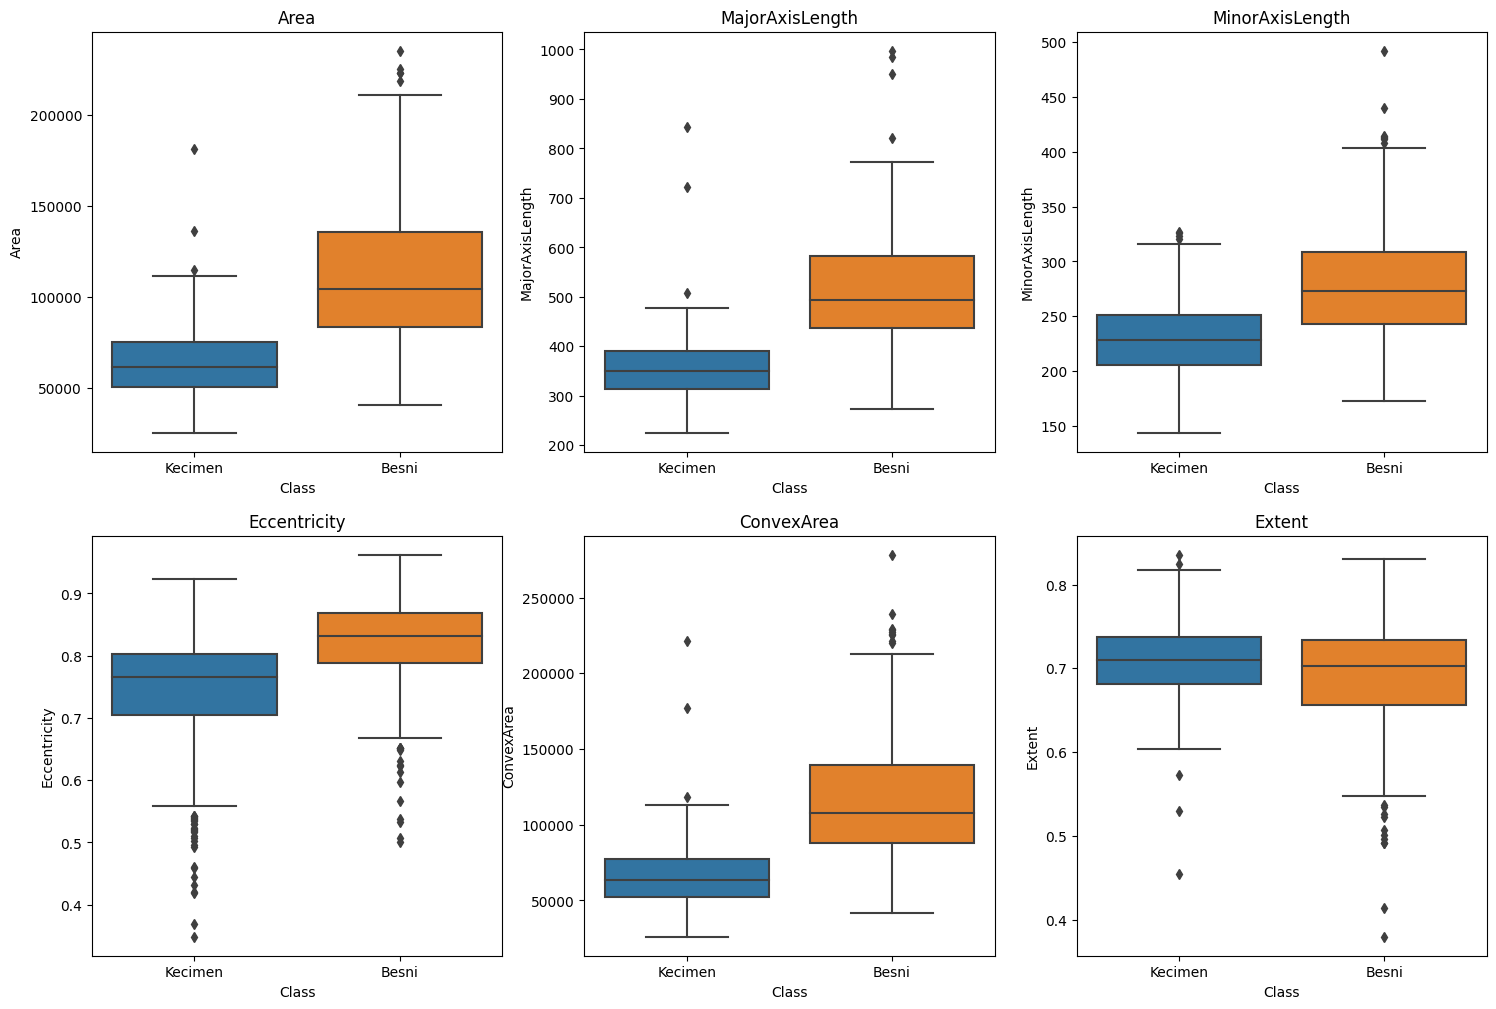

In [ ]:
# Hiển thị phân phối của dữ liệu, 
fig, ax = plt. subplots(2,3)
fig.set_size_inches(18, 12)
print (ax)
#Biến đổi mảng chứa các trục (axes) thành mảng 1 chiều để dễ dàng truy cập vào từng trục riêng lẻ.
ax = ax. flatten()
print (ax)
# Lấy danh sách tên các thuộc tính từ dataset và lưu vào biến features.
features = dataset.columns. tolist()
# Loại bỏ thuộc tính 'Class' khỏi danh sách features, vì 'Class' là thuộc tính dùng để phân loại.
features.remove('Class')
#  Duyệt qua từng trục (axes) và từng thuộc tính tương ứng
for axis, feature in zip(ax, features):
  # Vẽ biểu đồ boxplot (hộp đồ thị) cho từng lớp 'Class' và thuộc tính feature trên trục (axis) tương ứng
    sns.boxplot(data=dataset, x="Class", y = feature, ax=axis)
    axis.set_title(feature)


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


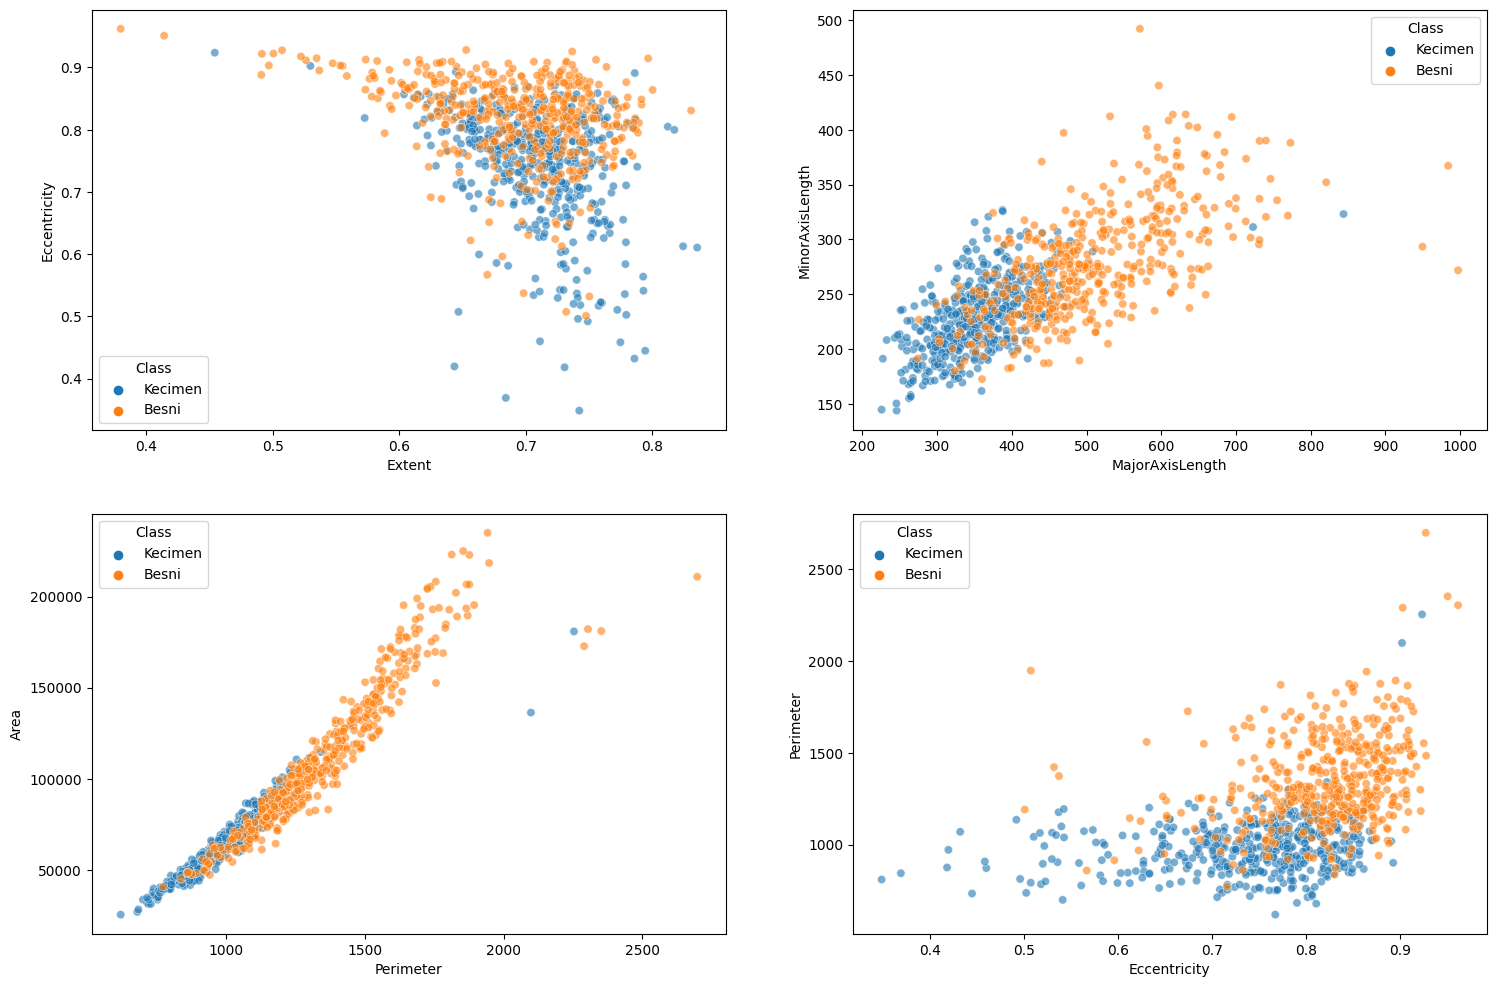

In [ ]:
# vẽ các biểu đồ phân tán
fig, ax = plt. subplots(2,2)
fig.set_size_inches(18, 12)
print (ax)
#Biến đổi mảng chứa các trục (axes) thành mảng 1 chiều để dễ dàng truy cập vào từng trục riêng lẻ.
ax = ax. flatten()
# Gán các cặp thuộc tính mà  muốn kiểm tra phân phối và quan hệ tương quan
inspect_pairs = [("Extent", "Eccentricity"), ('MajorAxisLength', 'MinorAxisLength'), ('Perimeter', 'Area'),('Eccentricity', 'Perimeter')]
for axis, pair in zip(ax, inspect_pairs):
    x_feat, y_feat = pair
    sns.scatterplot(data=dataset, x=x_feat, y=y_feat, hue= "Class", ax=axis, alpha = 0.6)


In [ ]:
print(dataset.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


Tiền sử lý dữ liệu :Missing value:  không có dữ liệu nào thiếu

In [148]:
data = dataset.values
data
X = data[:, 0:7]
print(X) # lấy tất cả các cột trừ cột cuối cùng

# y = dataset['Class']   # lấy cột cuối cùng
# # Tiền sử lý dữ liệu : chuyển categorical 
# y.map({'Kecimen':1, 'Besni' : 0}) 

Y = dataset["Class"].apply(lambda x : 1 if x == 'Kecimen' else 0).to_numpy()
Y
# Chuyển đổi dữ liệu để có cùng phạm vi nằm trong từ khoản từ 0->1
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scale = min_max_scaler.fit_transform(X)
# print(X_scale)


[[87524 442.2460114 253.291155 ... 90546 0.758650579 1184.04]
 [75166 406.690687 243.0324363 ... 78789 0.68412957 1121.786]
 [90856 442.2670483 266.3283177 ... 93717 0.637612812 1208.575]
 ...
 [99657 431.7069809 298.8373229 ... 106264 0.741098519 1292.828]
 [93523 476.3440939 254.1760536 ... 97653 0.658798253 1258.548]
 [85609 512.0817743 215.2719758 ... 89197 0.632019963 1272.862]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [149]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)


In [150]:
x_scale

array([[0.29637031, 0.28071404, 0.314376  , ..., 0.25550425, 0.83142179,
        0.27179088],
       [0.23742726, 0.23463777, 0.28494465, ..., 0.20886392, 0.66785449,
        0.24184205],
       [0.31226271, 0.2807413 , 0.35177845, ..., 0.26808369, 0.56575414,
        0.28359405],
       ...,
       [0.3542402 , 0.26705647, 0.44504387, ..., 0.31785796, 0.79289651,
        0.32412604],
       [0.32498331, 0.32490187, 0.31691469, ..., 0.2836979 , 0.61225439,
        0.3076348 ],
       [0.28723648, 0.37121445, 0.20530238, ..., 0.25015273, 0.55347831,
        0.3145209 ]])

In [151]:
X_train, X_val_and_test,Y_train, Y_val_and_test = train_test_split(x_scale, Y, test_size = 0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [166]:


model = Sequential([
    Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(7,)),
    
    Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
 
    Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])


In [167]:


model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])


In [168]:
es = EarlyStopping(monitor='val_accuracy', mode = 'max', verbose=1,patience=50)

In [169]:

mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode ='max')

In [170]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs=150, validation_data = (X_val, Y_val), callbacks = [mc, es])

Epoch 1/150
20/20 [==============================] - 2s 33ms/step - loss: 2.0228 - accuracy: 0.6683 - val_loss: 1.8364 - val_accuracy: 0.7630
Epoch 2/150
20/20 [==============================] - 0s 6ms/step - loss: 1.7015 - accuracy: 0.7540 - val_loss: 1.5537 - val_accuracy: 0.7926
Epoch 3/150
20/20 [==============================] - 0s 6ms/step - loss: 1.4445 - accuracy: 0.8270 - val_loss: 1.3269 - val_accuracy: 0.7481
Epoch 4/150
20/20 [==============================] - 0s 6ms/step - loss: 1.2333 - accuracy: 0.8175 - val_loss: 1.1245 - val_accuracy: 0.8222
Epoch 5/150
20/20 [==============================] - 0s 7ms/step - loss: 1.0430 - accuracy: 0.8508 - val_loss: 0.9483 - val_accuracy: 0.8815
Epoch 6/150
20/20 [==============================] - 0s 7ms/step - loss: 0.8954 - accuracy: 0.8571 - val_loss: 0.8456 - val_accuracy: 0.8444
Epoch 7/150
20/20 [==============================] - 0s 6ms/step - loss: 0.8132 - accuracy: 0.8349 - val_loss: 0.7515 - val_accuracy: 0.8889
Epoch 8/150


In [171]:

score = model.evaluate(X_test, Y_test)
print(score)

5/5 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.8593
[0.5171923041343689, 0.8592592477798462]


5/5 [==============================] - 0s 3ms/step
Accuracy: 0.8592592592592593
Precision: 0.8823529411764706
Recall: 0.8450704225352113
F1-score: 0.8633093525179857
         Accuracy  Precision   Recall  F1-score
Metrics  0.859259   0.882353  0.84507  0.863309
       Accuracy  Precision   Recall  F1-score
count  1.000000   1.000000  1.00000  1.000000
mean   0.859259   0.882353  0.84507  0.863309
std         NaN        NaN      NaN       NaN
min    0.859259   0.882353  0.84507  0.863309
25%    0.859259   0.882353  0.84507  0.863309
50%    0.859259   0.882353  0.84507  0.863309
75%    0.859259   0.882353  0.84507  0.863309
max    0.859259   0.882353  0.84507  0.863309


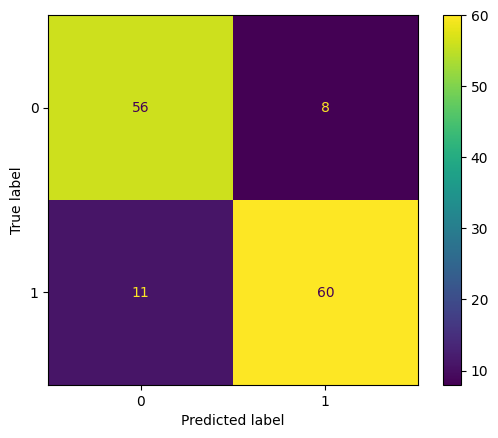

In [177]:
# Dự đoán nhãn trên tập kiểm tra
# Dự đoán xác suất nhãn cho dữ liệu thử nghiệm
y_pred_proba = model.predict(X_test)

# Chuyển đổi xác suất thành nhãn nhị phân
y_pred = (y_pred_proba > 0.5).astype(int)


# Tính toán các độ đo đánh giá
accuracy =  metrics.accuracy_score(Y_test, y_pred)
precision =  metrics.precision_score(Y_test, y_pred)
recall =  metrics.recall_score(Y_test, y_pred)
f1 =  metrics.f1_score(Y_test, y_pred)
# In kết quả
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Tạo DataFrame từ các mảng chứa các giá trị độ đo

df = pd.DataFrame({'Accuracy': [accuracy],
                   'Precision': [precision],
                   'Recall': [recall],
                   'F1-score': [f1]}, index=['Metrics'])

# In DataFrame
print(df)

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred))

NN=["Neural network", accuracy, precision,recall,f1]


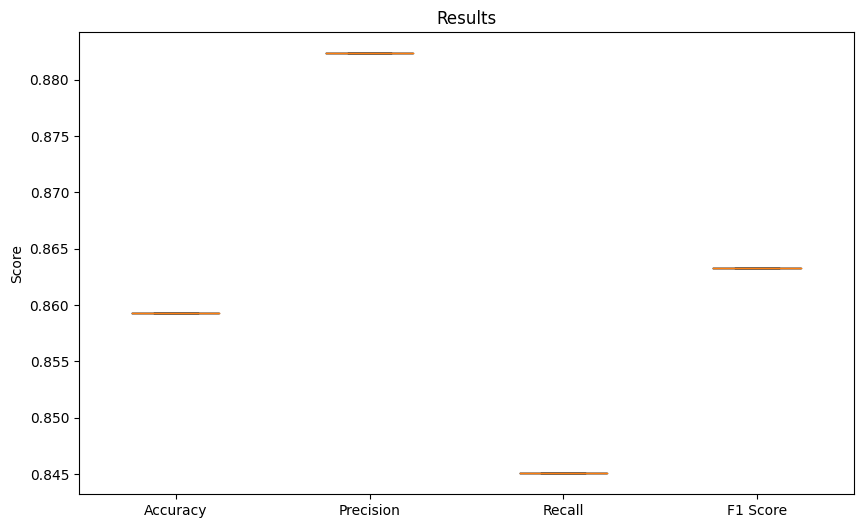

In [179]:
scores = [[accuracy], [precision], [recall], [f1]]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Results')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

Accuracy_NaiveBayes:  [0.8        0.85555556 0.83333333 0.81666667 0.78888889]
Precision_NaiveBayes: [0.80542986 0.85625928 0.85064935 0.82838305 0.7925    ]
Recall_NaiveBayes:  [0.8        0.85555556 0.83333333 0.81666667 0.78888889]
F1_NaiveBayes: [0.79910714 0.85548419 0.83125    0.81501666 0.78823529]
       Accuracy  Precision    Recall        F1
count  5.000000   5.000000  5.000000  5.000000
mean   0.818889   0.826644  0.818889  0.817819
std    0.026527   0.027714  0.026527  0.026609
min    0.788889   0.792500  0.788889  0.788235
25%    0.800000   0.805430  0.800000  0.799107
50%    0.816667   0.828383  0.816667  0.815017
75%    0.833333   0.850649  0.833333  0.831250
max    0.855556   0.856259  0.855556  0.855484


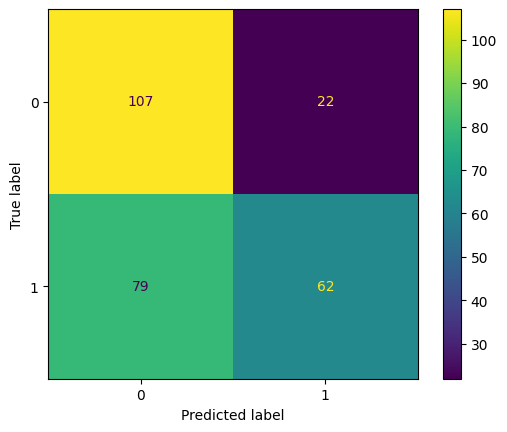

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
cv_results = cross_validate(clf, X, Y, cv=5, scoring=scoring)
# Extract the scores for each metric
Accuracy_SVM = cv_results['test_accuracy']
Precision_SVM = cv_results['test_precision_macro']
Recall_SVM = cv_results['test_recall_macro']
F1_SVM = cv_results['test_f1_macro']
SVM =['SVM', max(Accuracy_SVM), max(Precision_SVM),  max(Recall_SVM),  max(F1_SVM)]
print("Accuracy_NaiveBayes: ",  Accuracy_SVM)
print("Precision_NaiveBayes:",  Precision_SVM)
print("Recall_NaiveBayes: ",  Recall_SVM)
print("F1_NaiveBayes:",F1_SVM )
# Tạo DataFrame từ các mảng chứa các giá trị độ đo
df = pd.DataFrame({'Accuracy': Accuracy_SVM,
                   'Precision': Precision_SVM,
                   'Recall': Recall_SVM,
                   'F1': F1_SVM})

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

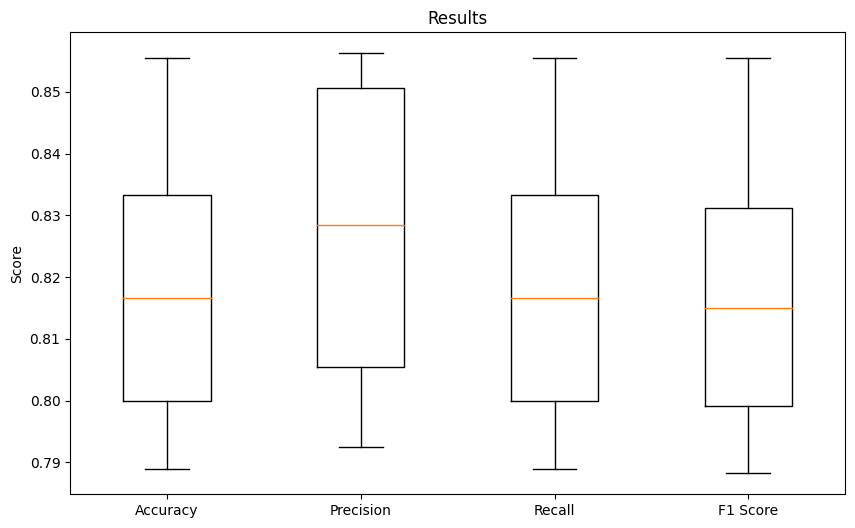

In [136]:
scores = [Accuracy_SVM, Precision_SVM, Recall_SVM, F1_SVM]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Results')
plt.ylabel('Score')

# Display the plot
plt.show()

       Accuracy  Precision    Recall        F1
count  5.000000   5.000000  5.000000  5.000000
mean   0.867778   0.871363  0.867778  0.867426
std    0.037965   0.037122  0.037965  0.038103
min    0.822222   0.822381  0.822222  0.822200
25%    0.844444   0.848750  0.844444  0.843963
50%    0.861111   0.874472  0.861111  0.859861
75%    0.894444   0.894493  0.894444  0.894441
max    0.916667   0.916718  0.916667  0.916664


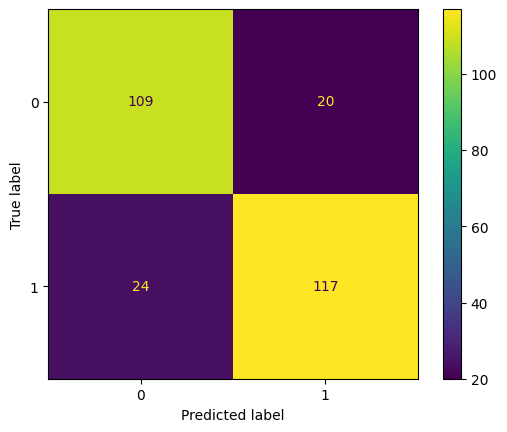

In [197]:

clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, Y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']
RF =['RF', max(accuracy_scores), max(precision_scores), max(recall_scores), max(f1_scores)]
# Tạo DataFrame từ các mảng chứa các giá trị độ đo
df = pd.DataFrame({'Accuracy': accuracy_scores,
                   'Precision': precision_scores,
                   'Recall': recall_scores,
                   'F1': f1_scores})

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))




SyntaxError: ignored

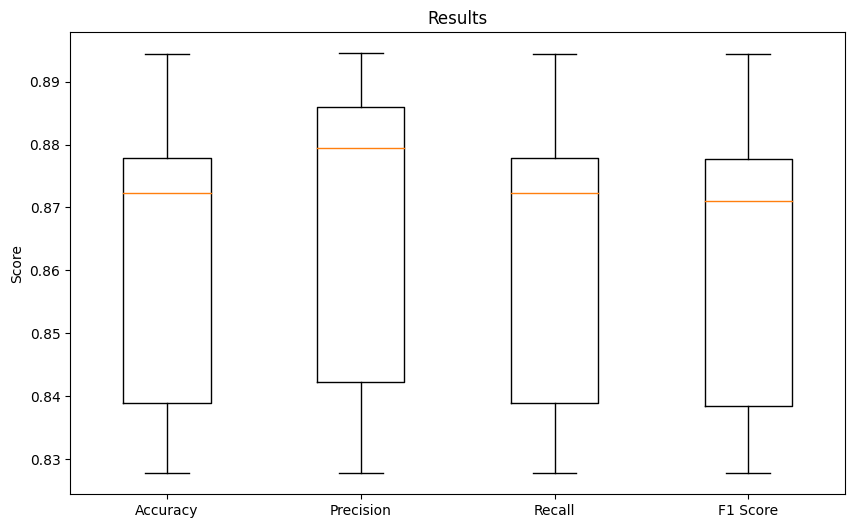

In [137]:
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Results')
plt.ylabel('Score')

# Display the plot
plt.show()

       Accuracy  Precision    Recall        F1
count  5.000000   5.000000  5.000000  5.000000
mean   0.865556   0.868612  0.865556  0.865283
std    0.029502   0.030145  0.029502  0.029515
min    0.833333   0.834821  0.833333  0.833148
25%    0.838889   0.838931  0.838889  0.838884
50%    0.866667   0.878633  0.866667  0.865605
75%    0.888889   0.888889  0.888889  0.888889
max    0.900000   0.901786  0.900000  0.899889
Accuracy_NaiveBayes:  [0.88888889 0.9        0.86666667 0.83888889 0.83333333]
Precision_NaiveBayes: [0.88888889 0.90178571 0.87863335 0.83893073 0.83482143]
Recall_NaiveBayes:  [0.88888889 0.9        0.86666667 0.83888889 0.83333333]
F1_NaiveBayes: [0.88888889 0.89988877 0.86560478 0.83888392 0.83314794]


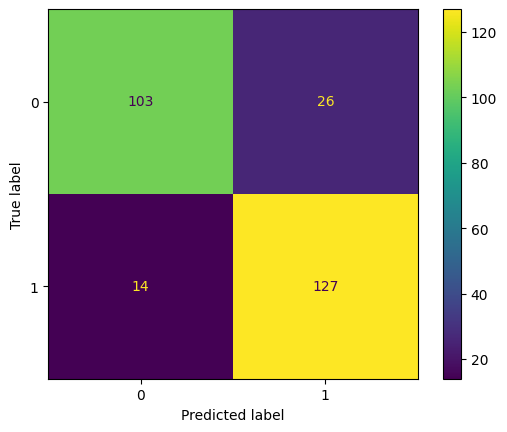

In [193]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv_results = cross_validate(clf, X, Y, cv=5, scoring=scoring)

# Extract the scores for each metric
Accuracy_NaiveBayes = cv_results['test_accuracy']
Precision_NaiveBayes = cv_results['test_precision_macro']
Recall_NaiveBayes = cv_results['test_recall_macro']
F1_NaiveBayes = cv_results['test_f1_macro']
# Tạo DataFrame từ các mảng chứa các giá trị độ đo
df = pd.DataFrame({'Accuracy': Accuracy_NaiveBayes,
                   'Precision': Precision_NaiveBayes,
                   'Recall': Recall_NaiveBayes,
                   'F1': F1_NaiveBayes})

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_NaiveBayes: ",  Accuracy_NaiveBayes)
print("Precision_NaiveBayes:",  Precision_NaiveBayes)
print("Recall_NaiveBayes: ",  Recall_NaiveBayes)
print("F1_NaiveBayes:",F1_NaiveBayes )
NB =['NeiveBayes', max(Accuracy_NaiveBayes), max(Precision_NaiveBayes), max(Recall_NaiveBayes), max(F1_NaiveBayes)]

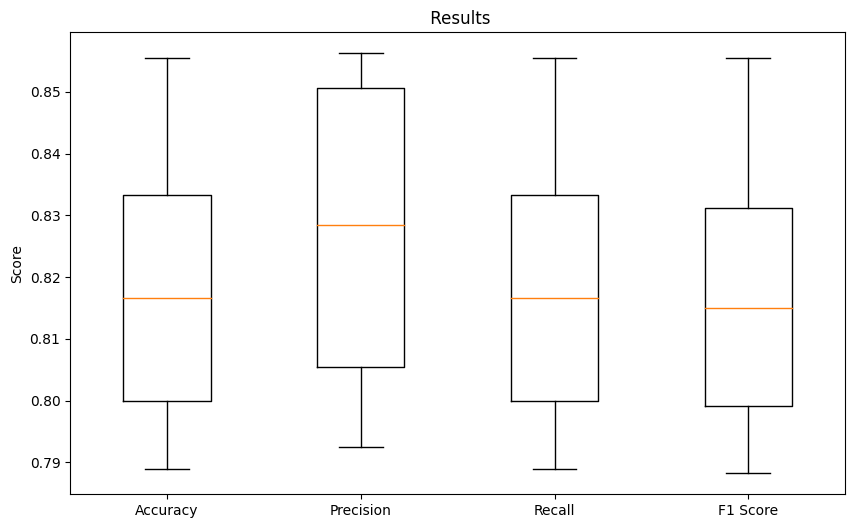

In [138]:
scores = [Accuracy_NaiveBayes, Precision_NaiveBayes, Recall_NaiveBayes, F1_NaiveBayes]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title(' Results')
plt.ylabel('Score')

# Display the plot
plt.show()

       Accuracy  Precision    Recall        F1
count  5.000000   5.000000  5.000000  5.000000
mean   0.835556   0.838302  0.835556  0.835201
std    0.015010   0.013588  0.015010  0.015221
min    0.822222   0.826250  0.822222  0.821672
25%    0.827778   0.832748  0.827778  0.827132
50%    0.833333   0.833498  0.833333  0.832817
75%    0.833333   0.837500  0.833333  0.833313
max    0.861111   0.861513  0.861111  0.861073
Accuracy_KNN:  [0.83333333 0.86111111 0.82777778 0.83333333 0.82222222]
Precision_KNN: [0.83349802 0.86151279 0.83274846 0.8375     0.82625   ]
Recall_KNN:  [0.83333333 0.86111111 0.82777778 0.83333333 0.82222222]
F1_KNN: [0.83331275 0.86107252 0.82713219 0.83281734 0.82167183]


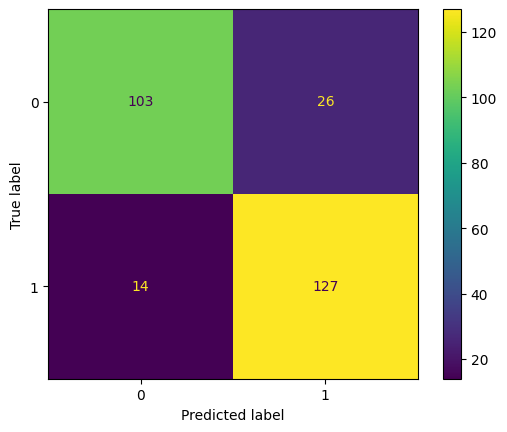

In [200]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv_results = cross_validate(clf, X, Y, cv=5, scoring=scoring)

# Extract the scores for each metric
Accuracy_KNN = cv_results['test_accuracy']
Precision_KNN = cv_results['test_precision_macro']
Recall_KNN = cv_results['test_recall_macro']
F1_KNN = cv_results['test_f1_macro']

# Tạo DataFrame từ các mảng chứa các giá trị độ đo
df = pd.DataFrame({'Accuracy': Accuracy_KNN,
                   'Precision': Precision_KNN,
                   'Recall': Recall_KNN,
                   'F1': F1_KNN})

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_KNN: ",  Accuracy_KNN)
print("Precision_KNN:",  Precision_KNN)
print("Recall_KNN: ",  Recall_KNN)
print("F1_KNN:",F1_KNN )
KNN =['KNN', max(Accuracy_KNN), max(Precision_KNN), max(Recall_KNN), max(F1_KNN)]

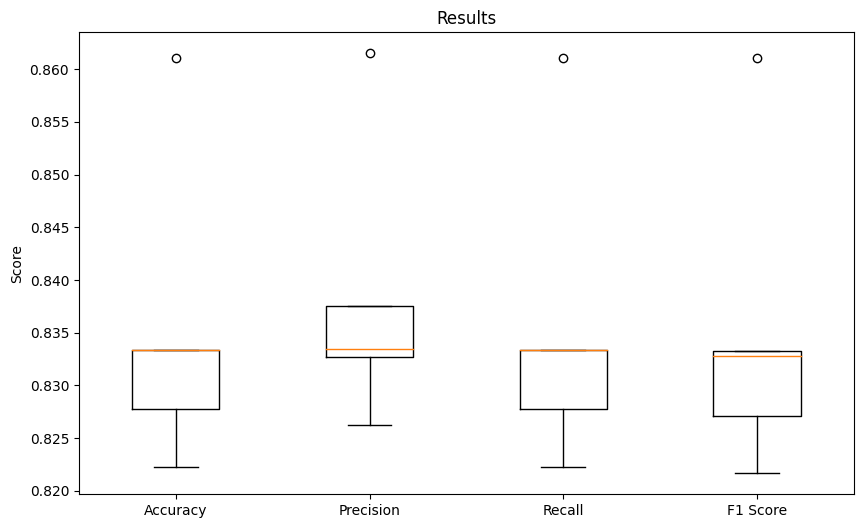

In [139]:
scores = [Accuracy_KNN, Precision_KNN, Recall_KNN, F1_KNN]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Results')
plt.ylabel('Score')

# Display the plot
plt.show()

       Accuracy  Precision    Recall        F1
count  5.000000   5.000000  5.000000  5.000000
mean   0.784444   0.788286  0.784444  0.783738
std    0.034111   0.035049  0.034111  0.034198
min    0.744444   0.748869  0.744444  0.743304
25%    0.766667   0.767857  0.766667  0.766407
50%    0.772222   0.776350  0.772222  0.771368
75%    0.811111   0.813589  0.811111  0.810737
max    0.827778   0.834762  0.827778  0.826875
Accuracy_DT:  [0.81111111 0.82777778 0.77222222 0.74444444 0.76666667]
Precision_DT: [0.81358885 0.83476233 0.77635042 0.74886878 0.76785714]
Recall_DT:  [0.81111111 0.82777778 0.77222222 0.74444444 0.76666667]
F1_DT: [0.83331275 0.86107252 0.82713219 0.83281734 0.82167183]


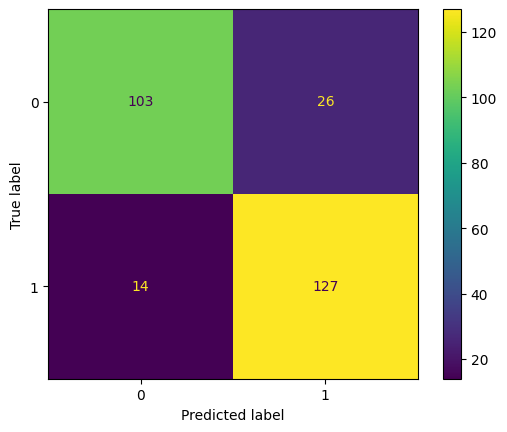

In [203]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv_results = cross_validate(clf, X, Y, cv=5, scoring=scoring)

# Extract the scores for each metric
Accuracy_DT = cv_results['test_accuracy']
Precision_DT = cv_results['test_precision_macro']
Recall_DT = cv_results['test_recall_macro']
F1_DT = cv_results['test_f1_macro']
# Tạo DataFrame từ các mảng chứa các giá trị độ đo
df = pd.DataFrame({'Accuracy': Accuracy_DT,
                   'Precision': Precision_DT,
                   'Recall': Recall_DT,
                   'F1': F1_DT})

# In ra cột so sánh của các độ đo
print(df.describe())
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_DT: ",  Accuracy_DT)
print("Precision_DT:",  Precision_DT)
print("Recall_DT: ",  Recall_DT)
print("F1_DT:",F1_KNN )
DT =['DT', max(Precision_DT),max( Precision_DT), max(Recall_DT),max( F1_DT)]

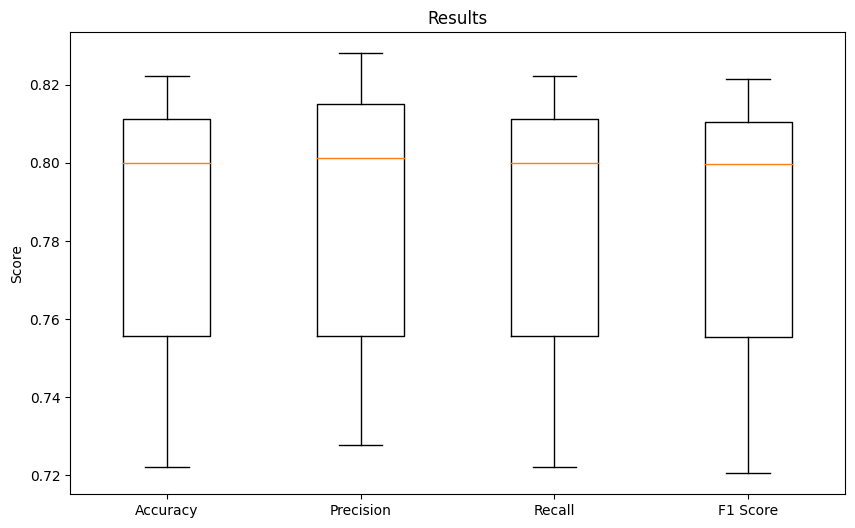

In [181]:
scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_DT]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Results')
plt.ylabel('Score')

# Display the plot
plt.show()

In [204]:
results_table = PrettyTable()
results_table.field_names = ["Classifier", "Accuracy", "Precision","Recall","F1 Score"]
results_table.add_row(RF)
results_table.add_row(SVM)
results_table.add_row(DT)
results_table.add_row(NB)
results_table.add_row(NN)
results_table.add_row(KNN)
print(results_table)

+----------------+--------------------+--------------------+--------------------+--------------------+
|   Classifier   |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+----------------+--------------------+--------------------+--------------------+--------------------+
|       RF       | 0.9166666666666666 | 0.9167181133473268 | 0.9166666666666667 | 0.9166640945708201 |
|      SVM       | 0.8555555555555555 | 0.8562592775853538 | 0.8555555555555556 | 0.8554841897233202 |
|       DT       | 0.8347623250535872 | 0.8347623250535872 | 0.8277777777777777 | 0.8268747479134995 |
|   NeiveBayes   |        0.9         | 0.9017857142857143 |        0.9         | 0.899888765294772  |
| Neural network | 0.8592592592592593 | 0.8823529411764706 | 0.8450704225352113 | 0.8633093525179857 |
|      KNN       | 0.8611111111111112 | 0.8615127919911012 | 0.8611111111111112 | 0.8610725201444847 |
+----------------+--------------------+--------------------+-------------